In [12]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load the dataset
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)

# Define the target variable
y = housing['SalePrice']

# Select all features excluding the target variable
X = housing.drop('SalePrice', axis=1)

# Drop PID and empty columns
housing.drop(columns=['PID'], inplace=True)
housing.dropna(axis=1, how='all', inplace=True)

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipelines for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])



In [7]:
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Define the ElasticNetCV model
elastic_net_cv_model = ElasticNetCV(cv=5, max_iter=10000)

# Create the final pipeline
elastic_net_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Ensure 'preprocessor' is defined elsewhere in your code
    ('regressor', elastic_net_cv_model)
])

# Perform cross-validation
elastic_net_scores = cross_val_score(elastic_net_pipeline, X, y, cv=5, scoring='r2')
elastic_net_mean_score = elastic_net_scores.mean()

# Fit the pipeline to the entire dataset
elastic_net_pipeline.fit(X, y)

# Extract the best alpha and l1_ratio values
best_alpha = elastic_net_cv_model.alpha_
best_l1_ratio = elastic_net_cv_model.l1_ratio_

print("Mean R^2 cross-validation score for ElasticNetCV:", elastic_net_mean_score)
print("Best alpha value selected by ElasticNetCV:", best_alpha)
print("Best l1_ratio value selected by ElasticNetCV:", best_l1_ratio)




Mean R^2 cross-validation score for ElasticNetCV: 0.180447924175893
Best alpha value selected by ElasticNetCV: 118.601377957355
Best l1_ratio value selected by ElasticNetCV: 0.5


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Load the dataset
data =  pd.read_csv('Ames_HousePrice.csv', index_col=0)

# Handle missing values, encoding, etc.
# Assuming 'SalePrice' is the target variable and 'features' is a list of predictor variables
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Drop PID and empty columns
housing.drop(columns=['PID'], inplace=True)
housing.dropna(axis=1, how='all', inplace=True)

# Preprocessing pipeline for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Combine preprocessor and Elastic Net model in a pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('elasticnet', ElasticNet())])

# Define the parameter grid
param_grid = {
    'elasticnet__alpha': [0.1, 1.0, 10.0],
    'elasticnet__l1_ratio': [0.1, 0.5, 0.9,0.95]
}

# GridSearch for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Best model
best_model = grid_search.best_estimator_

# Get best parameters
best_alpha = grid_search.best_params_['elasticnet__alpha']
best_l1_ratio = grid_search.best_params_['elasticnet__l1_ratio']


# Cross-validated performance metrics
cv_results = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')


print(f'R-squared Scores: {r2_scores}')
print(f'Mean R-squared: {np.mean(r2_scores)}')
print(f'Best ElasticNet alpha: {best_alpha}')
print(f'Best ElasticNet l1_ratio: {best_l1_ratio}')

R-squared Scores: [0.86708683 0.91892363 0.92911858 0.92368613 0.92620805]
Mean R-squared: 0.9130046431279748
Best ElasticNet alpha: 0.1
Best ElasticNet l1_ratio: 0.95


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 311759599155.3984, tolerance: 1090499258.1211674
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 376267525633.58154, tolerance: 1095980866.342593
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 413058831421.58405, tolerance: 1189901463.3215547
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_desc

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 395242665975.63495, tolerance: 1189901463.3215547
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 405959507754.7265, tolerance: 1220460612.956949
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 400097053079.4075, tolerance: 1208763334.6803842
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_desce

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 452221045980.35315, tolerance: 1208763334.6803842
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334234727351.44604, tolerance: 1090499258.1211674
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 406229781302.3374, tolerance: 1095980866.342593
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_desc

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385830179543.86005, tolerance: 1095980866.342593
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 424422767587.4461, tolerance: 1189901463.3215547
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 431141574939.0514, tolerance: 1220460612.956949
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descen

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 431412248458.24835, tolerance: 1220460612.956949
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 427055879668.4112, tolerance: 1208763334.6803842
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144795029871.93622, tolerance: 1090499258.1211674
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_desc

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 426395938372.4065, tolerance: 1208763334.6803842
  model = cd_fast.sparse_enet_coordinate_descent(


R-squared Scores: [0.8693734  0.92198492 0.92710177 0.92423785 0.9245767 ]
Mean R-squared: 0.9134549272068849
Best ElasticNet alpha: 0.004641588833612777
Best ElasticNet l1_ratio: 0.7000000000000001
Best Cross-Validation Score: 0.9134549272068849


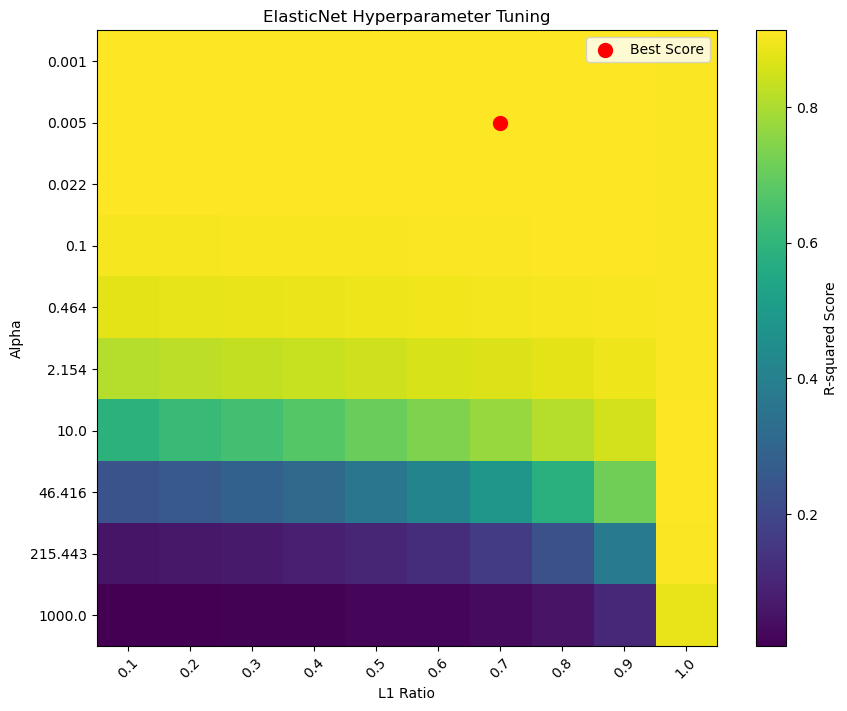

In [22]:
# Define the parameter grid with a wider range
param_grid = {
    'elasticnet__alpha': np.logspace(-3, 3, 10),
    'elasticnet__l1_ratio': np.linspace(0.1, 1.0, 10)
}

# GridSearch for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X, y)

# Best model
best_model = grid_search.best_estimator_

# Get best parameters
best_alpha = grid_search.best_params_['elasticnet__alpha']
best_l1_ratio = grid_search.best_params_['elasticnet__l1_ratio']
best_score = grid_search.best_score_

# Cross-validated performance metrics
cv_results = cross_val_score(best_model, X, y, cv=5, scoring='r2')

print(f'R-squared Scores: {cv_results}')
print(f'Mean R-squared: {np.mean(cv_results)}')
print(f'Best ElasticNet alpha: {best_alpha}')
print(f'Best ElasticNet l1_ratio: {best_l1_ratio}')
print(f'Best Cross-Validation Score: {best_score}')

# Preparing data for heatmap
results = pd.DataFrame(grid_search.cv_results_)
mean_test_scores = results['mean_test_score'].values.reshape(len(param_grid['elasticnet__alpha']), len(param_grid['elasticnet__l1_ratio']))

# Heatmap plot
plt.figure(figsize=(10, 8))
plt.imshow(mean_test_scores, interpolation='nearest', cmap='viridis', aspect='auto')
plt.xlabel('L1 Ratio')
plt.ylabel('Alpha')
plt.title('ElasticNet Hyperparameter Tuning')
cbar = plt.colorbar(label='R-squared Score')

# Annotate the best score
alpha_idx = np.where(param_grid['elasticnet__alpha'] == best_alpha)[0][0]
l1_ratio_idx = np.where(param_grid['elasticnet__l1_ratio'] == best_l1_ratio)[0][0]
plt.scatter(l1_ratio_idx, alpha_idx, color='red', s=100, label='Best Score')
plt.legend()

# Set the ticks
plt.xticks(np.arange(len(param_grid['elasticnet__l1_ratio'])), np.round(param_grid['elasticnet__l1_ratio'], 2), rotation=45)
plt.yticks(np.arange(len(param_grid['elasticnet__alpha'])), np.round(param_grid['elasticnet__alpha'], 3))

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 460932350133.62805, tolerance: 1090499258.1211674
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 534857865167.0982, tolerance: 1095980866.342593
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 559844222339.0488, tolerance: 1189901463.3215547
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_desce

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 542357744056.11475, tolerance: 1189901463.3215547
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 575974139789.2897, tolerance: 1220460612.956949
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 556003512282.3815, tolerance: 1208763334.6803842
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_desce

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 613489653238.1625, tolerance: 1208763334.6803842
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 488582058052.4428, tolerance: 1090499258.1211674
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 565986780355.7532, tolerance: 1095980866.342593
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descen

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 544642328856.42566, tolerance: 1095980866.342593
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 571603165223.0288, tolerance: 1189901463.3215547
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 601615041507.9481, tolerance: 1220460612.956949
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descen

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 599237616306.2173, tolerance: 1220460612.956949
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 582142392840.8502, tolerance: 1208763334.6803842
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201248131092.13556, tolerance: 1090499258.1211674
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_desce

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 460995769501.827, tolerance: 1090499258.1211674
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 534961150666.22894, tolerance: 1095980866.342593
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 560100580045.8063, tolerance: 1189901463.3215547
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descen

R-squared Scores: [0.85161685 0.90276478 0.89250095 0.90335142 0.89582469]
Mean R-squared: 0.8892117395394024
RMSE Scores: [32191.96921644 25869.09295469 23270.63526026 20617.37139337
 22088.94692962]
Mean RMSE: 24807.603150878083
Best ElasticNet alpha: 0.004641588833612777
Best ElasticNet l1_ratio: 0.8
Best Cross-Validation R-squared Score: 0.8892117395394024


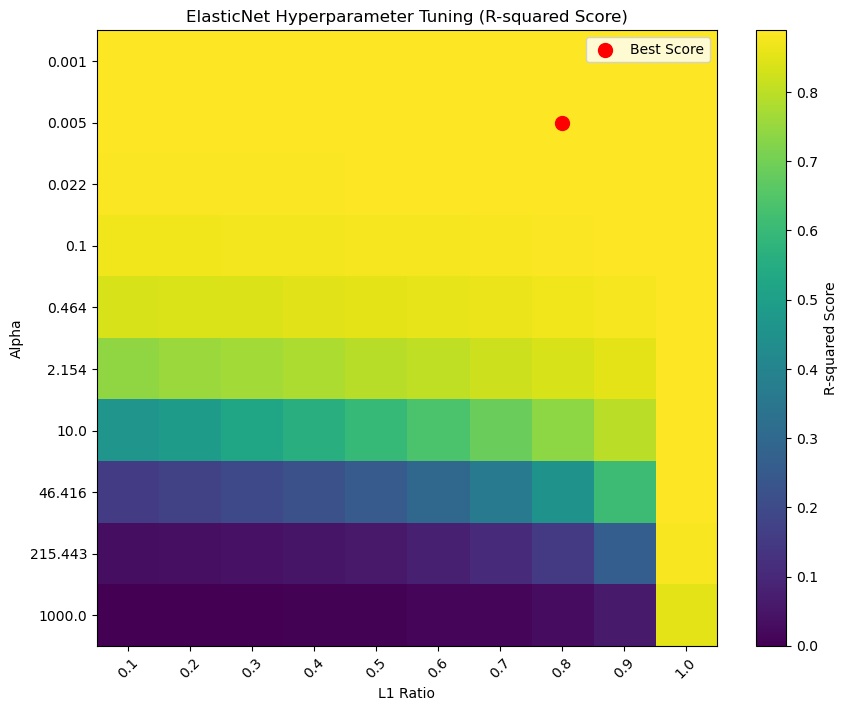

In [1]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import ElasticNet
# from sklearn.model_selection import GridSearchCV, cross_val_score
 from sklearn.metrics import mean_squared_error

# Load the dataset
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)

# Remove columns with missing values
housing = housing.dropna(axis=1)

# Define the target variable
y = housing['SalePrice']
X = housing.drop('SalePrice', axis=1)

# Preprocessing pipeline for numeric features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical features
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('elasticnet', ElasticNet())
])

# Define the parameter grid with a wider range
param_grid = {
    'elasticnet__alpha': np.logspace(-3, 3, 10),
    'elasticnet__l1_ratio': np.linspace(0.1, 1.0, 10)
}

# GridSearch for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X, y)

# Best model
best_model = grid_search.best_estimator_

# Get best parameters
best_alpha = grid_search.best_params_['elasticnet__alpha']
best_l1_ratio = grid_search.best_params_['elasticnet__l1_ratio']
best_score = grid_search.best_score_

# Cross-validated performance metrics for R-squared
cv_r2_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
mean_r2_score = np.mean(cv_r2_scores)

# Cross-validated performance metrics for RMSE
cv_rmse_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
mean_rmse_score = -np.mean(cv_rmse_scores)

print(f'R-squared Scores: {cv_r2_scores}')
print(f'Mean R-squared: {mean_r2_score}')
print(f'RMSE Scores: {-cv_rmse_scores}')
print(f'Mean RMSE: {mean_rmse_score}')
print(f'Best ElasticNet alpha: {best_alpha}')
print(f'Best ElasticNet l1_ratio: {best_l1_ratio}')
print(f'Best Cross-Validation R-squared Score: {best_score}')

# Preparing data for heatmap
results = pd.DataFrame(grid_search.cv_results_)
mean_test_scores = results['mean_test_score'].values.reshape(len(param_grid['elasticnet__alpha']), len(param_grid['elasticnet__l1_ratio']))

# Heatmap plot for R-squared scores
plt.figure(figsize=(10, 8))
plt.imshow(mean_test_scores, interpolation='nearest', cmap='viridis', aspect='auto')
plt.xlabel('L1 Ratio')
plt.ylabel('Alpha')
plt.title('ElasticNet Hyperparameter Tuning (R-squared Score)')
cbar = plt.colorbar(label='R-squared Score')

# Annotate the best score
alpha_idx = np.where(param_grid['elasticnet__alpha'] == best_alpha)[0][0]
l1_ratio_idx = np.where(param_grid['elasticnet__l1_ratio'] == best_l1_ratio)[0][0]
plt.scatter(l1_ratio_idx, alpha_idx, color='red', s=100, label='Best Score')
plt.legend()

# Set the ticks
plt.xticks(np.arange(len(param_grid['elasticnet__l1_ratio'])), np.round(param_grid['elasticnet__l1_ratio'], 2), rotation=45)
plt.yticks(np.arange(len(param_grid['elasticnet__alpha'])), np.round(param_grid['elasticnet__alpha'], 3))

plt.show()


In [13]:
#add POLY in numerical data 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# Preprocessing pipelines for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Add polynomial features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the ElasticNet model
elastic_net = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', ElasticNet())])

# Define the parameter grid
param_grid = {
    'regressor__alpha': np.logspace(-4, 4, 10),
    'regressor__l1_ratio': np.linspace(0, 1, 10)  # ElasticNet l1_ratio between 0 (Ridge) and 1 (Lasso)
}

# Perform Grid Search CV to find the best hyperparameters
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='r2')
grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated R^2 score: ", grid_search.best_score_)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.200e+11, tolerance: 1.090e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.319e+11, tolerance: 1.096e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.lin

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.304e+11, tolerance: 1.096e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.429e+11, tolerance: 1.190e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.505e+11, toler

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.153e+11, tolerance: 1.090e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.268e+11, tolerance: 1.096e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.399e+11, toler

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.396e+11, tolerance: 1.096e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.529e+11, tolerance: 1.190e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.613e+11, toler

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.195e+11, tolerance: 1.090e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.315e+11, tolerance: 1.096e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.441e+11, toler

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.649e+11, tolerance: 1.096e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.814e+11, tolerance: 1.190e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.906e+11, toler

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.331e+11, tolerance: 1.090e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.473e+11, tolerance: 1.096e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.616e+11, toler

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.449e+11, tolerance: 1.096e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.665e+11, tolerance: 1.190e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.787e+11, toler

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.755e+11, tolerance: 1.090e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.962e+11, tolerance: 1.096e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.155e+11, toler

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.598e+11, tolerance: 1.220e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.410e+11, tolerance: 1.209e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.lin

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.024e+11, tolerance: 1.096e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.311e+11, tolerance: 1.190e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.716e+11, toler

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.207e+12, tolerance: 1.090e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.320e+12, tolerance: 1.096e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.lin

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.863e+10, tolerance: 1.209e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.753e+12, tolerance: 1.090e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarni

Best parameters found:  {'regressor__alpha': 1291.5496650148827, 'regressor__l1_ratio': 1.0}
Best cross-validated R^2 score:  0.8903881522544319
